In [2]:
from pathlib import Path

import pandas as pd
import xarray as xr
from functions.data import DataLoader, WindProcessor
from matplotlib import pyplot as plt

try:
    import tomllib
except ModuleNotFoundError:
    import tomli as tomllib

In [13]:
date_start = "2025-03-14"
date_end = "2025-03-14"

dir_mask = (
    "/storage/research/actual01/disk1/urban/obs/LiDAR/Bristol/BRDIFU/%Y/%Y%m/%Y%m%d"
)
file_back_mask = "Background_*.txt"
file_vertical_mask = "Stare_*.hpl"
file_vad_mask = "VAD_*.hpl"

In [14]:

conf_file = sorted(
    Path(
        "/home/users/ti933703/pdra/Bristol_QLs/",
    ).glob("*.toml"),
)[0]


with conf_file.open("rb") as fp:
        conf = tomllib.load(fp)

init_dates = pd.date_range(date_start, date_end, freq="1D")

output_dir = Path("/home/users/ti933703/pdra/Bristol_QLs/outputs")
output_dir.mkdir(parents=True, exist_ok=True)

site = "BRDIFU"

In [ ]:
loader = DataLoader(conf, site, init_dates)
loader.load_files()

processor = WindProcessor(
        conf=conf,
        site=site,
        site_conf=loader.site_conf,
        init_dates=init_dates,
        output_dir=output_dir,
        files=loader.files,
    )

stare_ds = processor.process_stare()
wind_ds = processor.process_wind()

In [3]:
nc_file = Path(
    "/home/users/ti933703/pdra/Bristol_QLs/outputs/BRDIFU_Vertical_wind_profile_2025-03-14_2025-03-15.nc",
)

nc_file_wd = Path(
    "/home/users/ti933703/pdra/Bristol_QLs/outputs/BRDIFU_Horizontal_wind_VAD_2025-03-14_2025-03-15.nc",
)

test_nc = xr.open_dataset(nc_file)
test_nc_wd = xr.open_dataset(nc_file_wd)

In [4]:
test_nc

<xarray.Dataset> Size: 156MB
Dimensions:     (range: 197, time: 48601, height: 200)
Coordinates:
  * range       (range) float32 788B 63.0 81.0 99.0 ... 3.573e+03 3.591e+03
  * time        (time) datetime64[ns] 389kB 2025-03-14T00:00:34.319987968 ......
Dimensions without coordinates: height
Data variables:
    beta_raw    (time, height) float32 39MB ...
    beta        (time, height) float32 39MB ...
    w_wind_raw  (time, height) float32 39MB ...
    w_wind      (time, height) float32 39MB ...
    elevation   (time) float32 194kB ...
Attributes: (12/25)
    serial_number:             175
    doppy_version:             0.5.4
    title:                     Vertical doppler velocity from Halo lidar
    summary:                   
    keywords:                  GCMD:EARTH SCIENCE, GCMD:ATMOSPHERE, GCMD:ATMO...
    keywords_vocabulary:       GCMD:GCMD Keywords,CF:NetCDF COARDS Climate an...
    ...                        ...
    instrument:                GCMD:In Situ/Laboratory Instruments, GCMD:Prof...
    instrument_vocabulary:     GCMD:GCMD keywords
    cdm_data_type:             
    featureType:               timeSeries
    metadata_link:             
    references:

In [5]:
test_nc_wd

<xarray.Dataset> Size: 2MB
Dimensions:         (range: 197, time: 287)
Coordinates:
  * range           (range) float32 788B 60.85 78.24 ... 3.451e+03 3.469e+03
  * time            (time) datetime64[ns] 2kB 2025-03-14T00:07:44.159987968 ....
Data variables:
    u_wind_raw      (time, range) float32 226kB ...
    u_wind          (time, range) float32 226kB ...
    v_wind_raw      (time, range) float32 226kB ...
    v_wind          (time, range) float32 226kB ...
    w_wind_raw      (time, range) float32 226kB ...
    w_wind          (time, range) float32 226kB ...
    ws_raw          (time, range) float32 226kB ...
    ws              (time, range) float32 226kB ...
    wd_raw          (time, range) float32 226kB ...
    wd              (time, range) float32 226kB ...
    azimuth_offset  float32 4B ...
Attributes: (12/25)
    serial_number:             175
    doppy_version:             0.5.4
    title:                     Horizontal wind speed and direction from Halo ...
    summary:                   
    keywords:                  GCMD:EARTH SCIENCE, GCMD:ATMOSPHERE, GCMD:ATMO...
    keywords_vocabulary:       GCMD:GCMD Keywords,CF:NetCDF COARDS Climate an...
    ...                        ...
    instrument:                GCMD:In Situ/Laboratory Instruments, GCMD:Prof...
    instrument_vocabulary:     GCMD:GCMD keywords
    cdm_data_type:             
    featureType:               timeSeries
    metadata_link:             
    references:

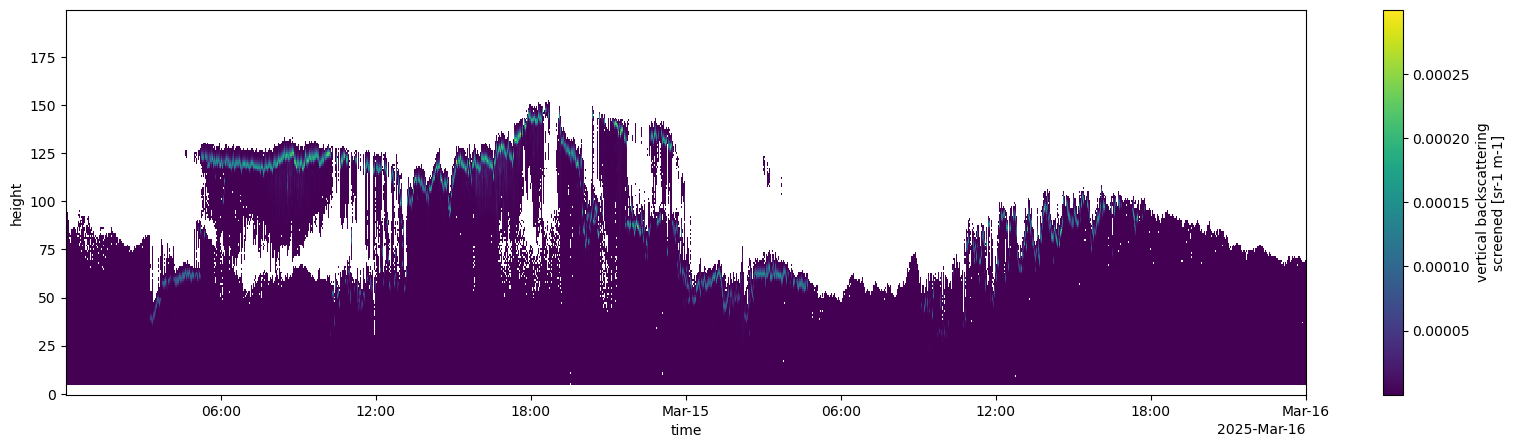

In [6]:
test_nc.beta.plot(x="time",figsize=[20,5])
plt.show()

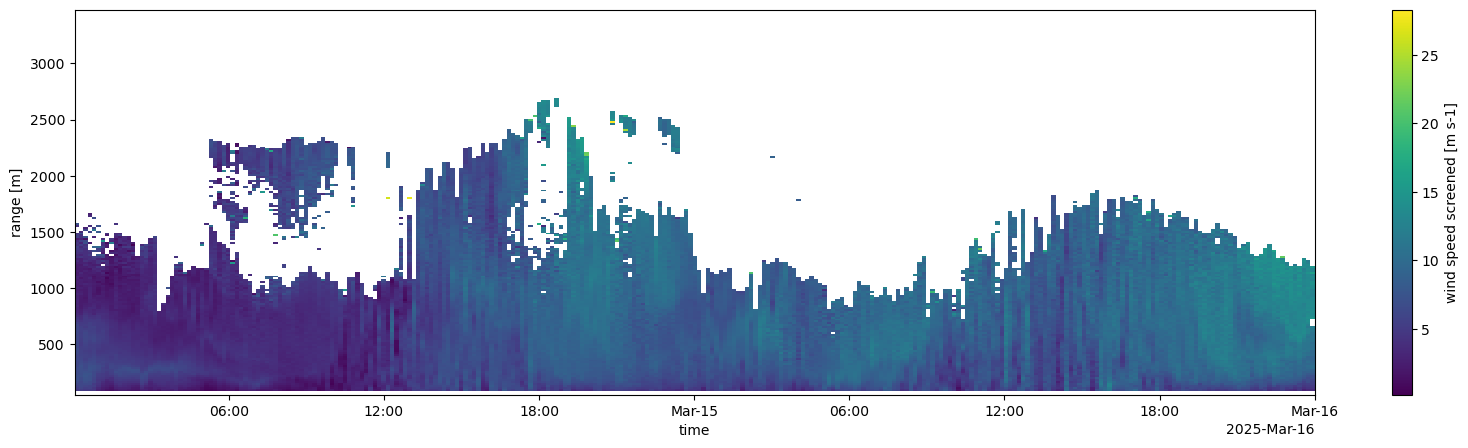

In [7]:
test_nc_wd.ws.plot(x="time",figsize=[20,5])
plt.show()